## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Load Data

In [3]:
train = pd.read_csv("HAR_train.csv")
test = pd.read_csv("HAR_test.csv")

## Combine both the data frames

In [4]:
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)

In [5]:
train.shape, test.shape

((7352, 564), (2947, 564))

In [6]:
both.sample(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
3970,0.286482,-0.004199,-0.116146,-0.978447,-0.951647,-0.961970,-0.984710,-0.961820,-0.964288,-0.912973,...,-0.007712,0.064342,0.467554,0.442353,-0.646012,0.307363,0.145917,#21,STANDING,Train
2138,0.193448,-0.007061,-0.063788,-0.413921,-0.054942,-0.548669,-0.445628,-0.039188,-0.503764,-0.233646,...,0.529651,0.043165,-0.971837,0.053152,-0.799595,0.228414,-0.030868,#11,WALKING,Train
8476,0.271667,-0.015173,-0.100887,-0.979237,-0.980670,-0.980865,-0.978887,-0.982065,-0.978874,-0.924497,...,0.091262,-0.258187,0.511771,0.632416,0.535715,0.998942,-0.184421,#10,LAYING,Test
7514,0.275841,-0.018404,-0.102823,-0.994661,-0.980339,-0.967218,-0.995212,-0.980519,-0.966055,-0.941555,...,-0.047229,-0.064844,0.655252,0.192171,-0.623903,0.332881,-0.093890,#2,STANDING,Test
5006,0.294881,-0.013610,-0.095752,-0.363280,-0.051462,0.208476,-0.403445,-0.153264,0.180450,0.105806,...,-0.275817,-0.576339,-0.892668,-0.343214,-0.769186,0.190392,0.153257,#23,WALKING,Train
3374,0.332490,-0.019924,-0.127322,-0.293552,-0.058675,-0.183969,-0.279619,-0.066719,-0.140271,-0.185342,...,-0.827040,0.522538,-0.313929,0.884711,-0.752596,0.141277,0.191031,#17,WALKING,Train
4254,0.279726,-0.023457,-0.102515,-0.993204,-0.970978,-0.985139,-0.994361,-0.970649,-0.983849,-0.929654,...,-0.054616,0.460119,0.329919,0.599740,-0.915942,0.113359,0.077670,#21,SITTING,Train
9799,0.279076,-0.030167,-0.062673,-0.975633,-0.829110,-0.835026,-0.976952,-0.817335,-0.820125,-0.908972,...,0.008738,0.060157,-0.381066,0.148889,-0.932155,0.131899,0.052582,#20,SITTING,Test
10010,0.272466,-0.020462,-0.102902,-0.983718,-0.975848,-0.966037,-0.984693,-0.978663,-0.970584,-0.928203,...,0.072773,-0.214946,0.299943,-0.438014,0.586879,-0.539999,-0.465558,#24,LAYING,Test
1900,0.244133,-0.035862,-0.018529,-0.179635,0.358962,0.216186,-0.181505,0.345956,0.234961,-0.053884,...,0.330715,-0.681401,-0.950373,0.044752,-0.508282,0.270134,0.316548,#8,WALKING_UPSTAIRS,Train


In [7]:
both.dtypes.value_counts()

float64    561
object       3
dtype: int64

In [8]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


## Activity Visualization

<BarContainer object of 6 artists>

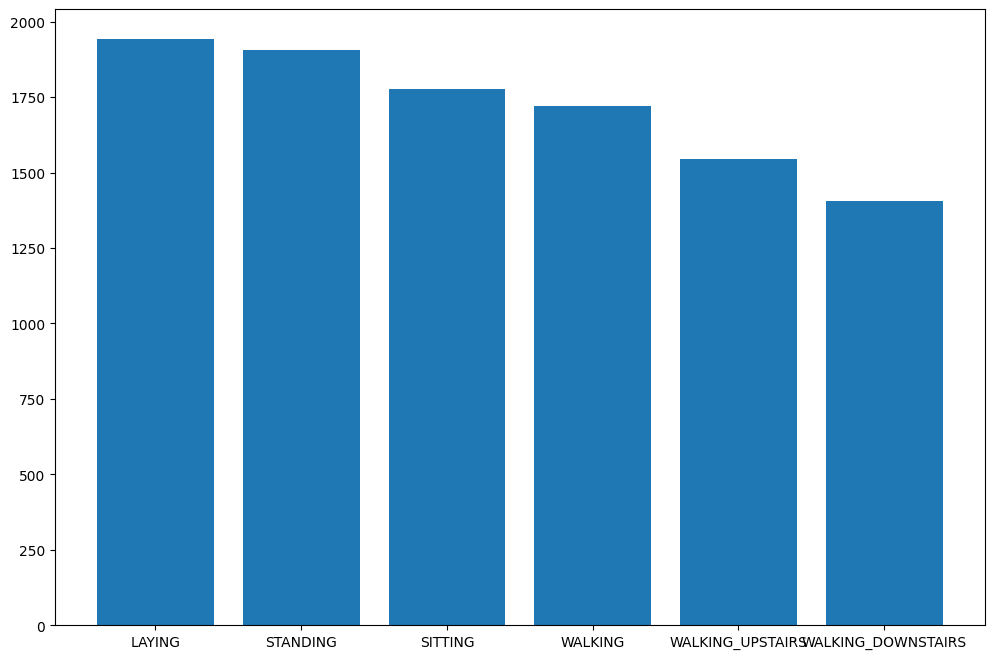

In [9]:
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

## Data Preparation

In [10]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

## Scaling Data

In [11]:
# Standard Scaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train)

## Data Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

In [13]:
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

## Activity Recognition Algorithm

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.92      0.87      0.90       364
          STANDING       0.89      0.93      0.91       390
           WALKING       0.96      0.99      0.97       335
WALKING_DOWNSTAIRS       0.99      0.95      0.97       278
  WALKING_UPSTAIRS       0.98      0.98      0.98       316

          accuracy                           0.95      2060
         macro avg       0.96      0.95      0.95      2060
      weighted avg       0.95      0.95      0.95      2060



<Axes: >

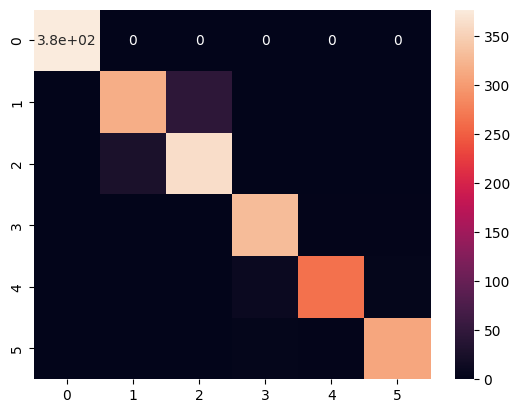

In [14]:
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)